# 2. Baseline: Lineare Regression

**KI1-Projekt 308** — California Housing Datensatz

Referenzmodell für den Vergleich aller weiteren Methoden.
Dieses Notebook stellt die Baseline her, gegen die alle anderen Modelle verglichen werden.

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from utils.data import load_and_clean_data, get_train_test_split
from utils.evaluation import evaluate_model, add_result
from utils.plotting import plot_predicted_vs_actual, plot_residuals, plot_feature_importances

plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## 2.1 Daten laden

In [2]:
df = load_and_clean_data()
X_train, X_test, y_train, y_test, feature_names = get_train_test_split(df)
print(f"Training:  {X_train.shape[0]} Samples, {X_train.shape[1]} Features")
print(f"Test:      {X_test.shape[0]} Samples")
print(f"Features:  {feature_names}")

Training:  13908 Samples, 8 Features
Test:      3478 Samples
Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## 2.2 Lineare Regression (alle Features, ohne Skalierung)

In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)

result_lr = evaluate_model(lr, X_train, X_test, y_train, y_test, "Lineare Regression")
add_result(result_lr)


  Lineare Regression
  R² Score:  Train = 0.6465  |  Test = 0.6326
  MAE:       Train = 0.4252  |  Test = 0.4341
  RMSE:      Train = 0.5710  |  Test = 0.5779


In [4]:
# Koeffizienten der linearen Regression
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Koeffizient': lr.coef_
}).sort_values('Koeffizient', key=abs, ascending=False)

print(f"Intercept: {lr.intercept_:.4f}\n")
print(coef_df.to_string(index=False))

Intercept: -31.1867

   Feature  Koeffizient
 AveBedrms     1.157248
    MedInc     0.440822
  Latitude    -0.387141
 Longitude    -0.379266
  AveOccup    -0.340391
  AveRooms    -0.123839
  HouseAge     0.008992
Population     0.000059


Gespeichert: results/baseline_pred_vs_actual.png und results/baseline_pred_vs_actual.pdf


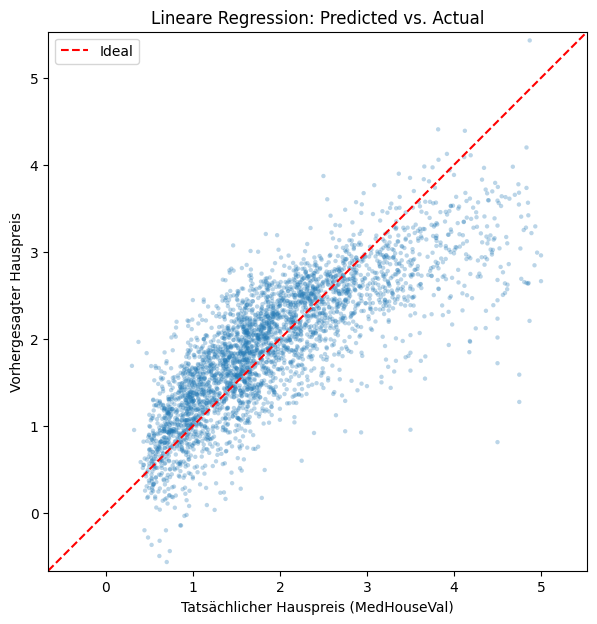

In [5]:
fig, ax = plot_predicted_vs_actual(
    y_test, lr.predict(X_test),
    title="Lineare Regression: Predicted vs. Actual",
    save_name="baseline_pred_vs_actual"
)
plt.show()

Gespeichert: results/baseline_residuals.png und results/baseline_residuals.pdf


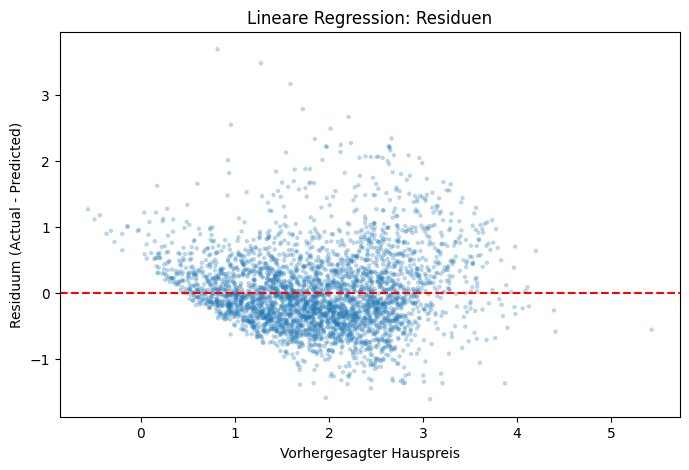

In [6]:
fig, ax = plot_residuals(
    y_test, lr.predict(X_test),
    title="Lineare Regression: Residuen",
    save_name="baseline_residuals"
)
plt.show()

## 2.3 Lineare Regression nur mit MedInc (stärkstes Feature)

In [7]:
# Nur MedInc als Feature
medinc_idx = feature_names.index('MedInc')
X_train_medinc = X_train[:, medinc_idx].reshape(-1, 1)
X_test_medinc = X_test[:, medinc_idx].reshape(-1, 1)

lr_medinc = LinearRegression()
lr_medinc.fit(X_train_medinc, y_train)

result_medinc = evaluate_model(lr_medinc, X_train_medinc, X_test_medinc, y_train, y_test, "LR nur MedInc")
add_result(result_medinc)


  LR nur MedInc
  R² Score:  Train = 0.4343  |  Test = 0.4357
  MAE:       Train = 0.5500  |  Test = 0.5447
  RMSE:      Train = 0.7223  |  Test = 0.7162


## 2.4 Zusammenfassung

Die Baseline Lineare Regression liefert den Referenz-R²-Wert.
Alle weiteren Modelle sollen diesen übertreffen.

**Beobachtungen:**
- MedInc allein erklärt bereits einen Großteil der Varianz
- Residuen zeigen systematische Muster → nicht-lineare Zusammenhänge vorhanden
- Verbesserungspotenzial durch Feature-Engineering und komplexere Modelle